In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/avakh/Desktop/sml_4_data/data/key-countries-pivoted_csv.csv")

In [3]:
df.head()

,Date,China,US,United_Kingdom,Italy,France,Germany,Spain,Iran
0,2020-01-22,548,1,0,0,0,0,0,0
1,2020-01-23,643,1,0,0,0,0,0,0
2,2020-01-24,920,2,0,0,2,0,0,0
3,2020-01-25,1406,2,0,0,3,0,0,0
4,2020-01-26,2075,5,0,0,3,0,0,0


In [6]:
df1=df[["Date","United_Kingdom"]]

In [7]:
df1.head()

,Date,United_Kingdom
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [8]:
df1.reset_index(drop=True, inplace=True)

In [9]:
df1.set_index('Date',inplace=True)

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [13]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df1['United_Kingdom'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\avakh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\avakh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [14]:
l1=results.predict(start=552,end=600,dynamic=True)

In [15]:
l1.to_frame()

,predicted_mean
2021-07-27,5.773472e+06
2021-07-28,5.798333e+06
2021-07-29,5.822924e+06
2021-07-30,5.847873e+06
2021-07-31,5.873708e+06
2021-08-01,5.899004e+06
2021-08-02,5.924935e+06
2021-08-03,5.950811e+06
2021-08-04,5.976943e+06
2021-08-05,6.003367e+06


In [16]:
frames = [df1, l1]

In [17]:
result = pd.concat(frames)

In [18]:
result

,United_Kingdom,0
2020-01-22,0.0,NaN
2020-01-23,0.0,NaN
2020-01-24,0.0,NaN
2020-01-25,0.0,NaN
2020-01-26,0.0,NaN
...,...,...
2021-09-09 00:00:00,NaN,6.947709e+06
2021-09-10 00:00:00,NaN,6.974626e+06
2021-09-11 00:00:00,NaN,7.001370e+06
2021-09-12 00:00:00,NaN,7.028245e+06


<AxesSubplot:>

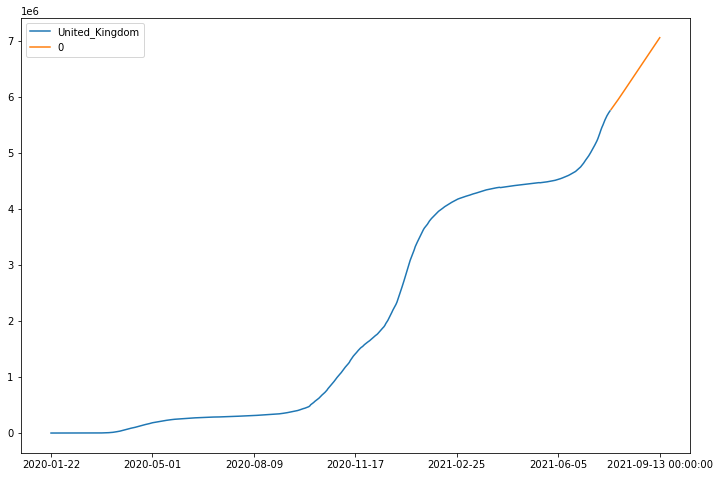

In [19]:
result[['United_Kingdom',0]].plot(figsize=(12,8))